In [1]:
%load_ext autoreload
%autoreload 2
import glob
import random
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
from functions import *
from utils import *
digit_files = glob.glob("../../data/archive/Digit/2/*.jpg")

#### Calculate average cicularity of images for different digits

In [2]:
# # separate out a few images for template generation
# digit_0 = glob.glob("../../data/archive/Digit/0/*.jpg")
# digit_5 = glob.glob("../../data/archive/Digit/5/*.jpg")
# digit_8 = glob.glob("../../data/archive/Digit/8/*.jpg")
# digit_9 = glob.glob("../../data/archive/Digit/9/*.jpg")

# digit_circularity = {
#     "0": [],
#     "5": [],
#     "8": [],
#     "9": []
# }
# for i, digit in enumerate(digit_0):
    
#     frame,_, largest_contour, dx, dy = find_skin_color_blobs(cv2.imread(digit))
#     _, _, _, _, _, circularity = get_shape_features(frame, largest_contour, dx, dy)
#     digit_circularity["0"].append(circularity)
# print(f"Digit 0: {np.mean(digit_circularity['0'])}")

# for i, digit in enumerate(digit_5):
#         frame,_, largest_contour, dx, dy = find_skin_color_blobs(cv2.imread(digit))
#         _, _, _, _, _, circularity = get_shape_features(frame, largest_contour, dx, dy)
#         digit_circularity["5"].append(circularity)
# print(f"Digit 5: {np.mean(digit_circularity['5'])}")


# for i, digit in enumerate(digit_8):
#         frame,_, largest_contour, dx, dy = find_skin_color_blobs(cv2.imread(digit))
#         _, _, _, _, _, circularity = get_shape_features(frame, largest_contour, dx, dy)
#         digit_circularity["8"].append(circularity)
# print(f"Digit 8: {np.mean(digit_circularity['8'])}")

# for i, digit in enumerate(digit_9):
#             frame,_, largest_contour, dx, dy = find_skin_color_blobs(cv2.imread(digit)) 
#             _, _, _, _, _, circularity = get_shape_features(frame, largest_contour, dx, dy)
#             digit_circularity["9"].append(circularity)
# print(f"Digit 9: {np.mean(digit_circularity['9'])}")


In [3]:
# # generate plots from 10 randomly selected images from digit 0 and their circularity
# fig, ax = plt.subplots(1, 5, figsize=(20, 10))
# for i in range(5):
#     img = cv2.imread(digit_0[i])
#     frame,_, largest_contour,dx, dy = find_skin_color_blobs(img)
#     _, _, _, _, _, circularity = get_shape_features(frame, largest_contour, dx, dy)
#     ax[i].imshow(frame)
#     ax[i].set_title(f"Circularity: {circularity:.2f}")
#     ax[i].axis("off")
# plt.show()



In [4]:
# # generate plots from 10 randomly selected images from digit 0 and their circularity
# fig, ax = plt.subplots(1, 5, figsize=(40, 20))
# for i in range(5):
#     img = cv2.imread(digit_5[i])
#     frame,_, largest_contour,dx, dy = find_skin_color_blobs(img)
#     _, _, _, _, _, circularity = get_shape_features(frame, largest_contour, dx, dy)
#     ax[i].imshow(frame)
#     ax[i].set_title(f"Circularity: {circularity:.2f}")
#     ax[i].axis("off")
# plt.show()



#### Generate average template from the images of the same digit

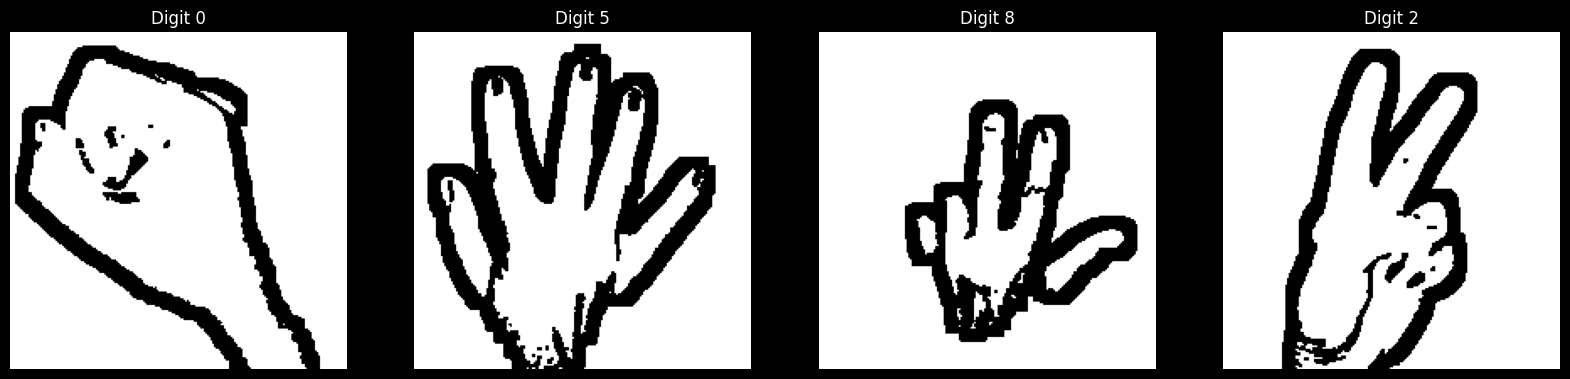

In [5]:
templates = get_templates("../../data/archive/Digit/")


template_pyramids = {k: get_pyramid(v) for k, v in templates.items()}

Main

In [6]:
cap = cv2.VideoCapture(0)
ret, prev_frame = cap.read()
if not ret:
    print("Can't receive frame (stream end?). Exiting ...")
    exit(0)

cv2.namedWindow('frame', cv2.WINDOW_NORMAL)
cv2.imshow('frame', prev_frame)

cv2.namedWindow('diff', cv2.WINDOW_NORMAL)
cv2.namedWindow('skin', cv2.WINDOW_NORMAL)

while True:
    ret, frame = cap.read()
    frame_immutable = frame
    if not ret:
        print("Can't receive frame (stream end?). Exiting ...")
        break
    cv2.imshow('frame', frame)

    diff = find_frame_difference(frame, prev_frame)
    cv2.imshow('diff', diff)

    # frame_skin = find_skin_color_blobs(frame)
    frame_skin, skin_mask, largest_contour, bbx_x, bbx_y  = find_skin_color_blobs(frame)
    if skin_mask is None or len(largest_contour) == 0:
        prev_frame = frame
        continue
    cv2.imshow('skin', skin_mask)

    frame_shape, centroid, position, orientation, size, circularity = get_shape_features(frame_skin, largest_contour, bbx_x, bbx_y)
    cv2.imshow('skin', frame_shape)

    best_gesture = custom_template_matching(skin_mask=skin_mask, template_pyramids=template_pyramids, threshold=0.5) # TODO: can use classwise thresholds
    if best_gesture:
        print(f"Best gesture: {best_gesture}")
        cv2.putText(frame_shape, f"Best gesture: {best_gesture}", (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2, cv2.LINE_AA)
        cv2.imshow('skin', frame_shape)
    prev_frame = frame
    
    if cv2.waitKey(30) == 27:
        print("esc key is pressed by user") 
        break


cap.release()
cv2.destroyAllWindows()
cv2.waitKey(1)

qt.qpa.plugin: Could not find the Qt platform plugin "wayland" in "/home/appledora/.local/lib/python3.8/site-packages/cv2/qt/plugins"


esc key is pressed by user


-1